In [1]:
import pandas as pd

# # загрузка
# ratings1 = pd.read_csv('data/ratings1.csv', sep=',')
# ratings2 = pd.read_csv('data/ratings2.csv', sep=',')
# dates = pd.read_csv('data/dates.csv', sep=',')
# movies = pd.read_csv('data/movies.csv', sep=',')#, index_col='movieId')

# # объединение 1 с 2 по столбцам
# ratings = pd.concat([ratings1, ratings2],ignore_index=True)

# # Удаление дублеката
# ratings = ratings.drop_duplicates(ignore_index=True)

# # объединение 1-2 с 3 по строкам
# ratings_dates = pd.concat([ratings, dates], axis=1)

# # объединение 1-3 с 4 по индексов филимов
# merged2 = ratings_dates.merge(
#     movies,
#     on='movieId',
#     how='outer'
# )
# # print('Число строк в таблице merged2: ', merged2.shape[0])
# # display(merged2.tail())

In [5]:
ratings_movies = pd.read_csv('../data/ratings_movies.csv', sep=',')
# ratings_movies

Для решения задач нам понадобится выделить из признака title год выпуска фильма. Для этого напишем функцию get_year_release(arg)

In [6]:
#библиотека для регулярных выражений
import re 
def get_year_release(arg):
    #находим все слова по шаблону "(DDDD)"
    candidates = re.findall(r'\(\d{4}\)', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        #если число вхождений больше 0,
	#очищаем строку от знаков "(" и ")"
        year = candidates[0].replace('(', '')
        year = year.replace(')', '')
        return int(year)
    else:
        #если год не указан, возвращаем None
        return None

In [7]:
ratings_movies['year_release']=ratings_movies['title'].apply(get_year_release)
print('Количество пустых строк :', ratings_movies['year_release'].isnull().sum ())
print('Kоличество уникальных дат:',ratings_movies['year_release'].nunique())
print(ratings_movies['year_release'].value_counts())

Количество пустых строк : 18
Kоличество уникальных дат: 106
year_release
1995.0    6144
1994.0    5296
1999.0    4536
1996.0    4509
2000.0    4268
          ... 
1903.0       2
1908.0       1
1917.0       1
1915.0       1
1919.0       1
Name: count, Length: 106, dtype: int64


8.2

In [8]:
print('Какой фильм, выпущенный в 1999 году, получил наименьшую среднюю оценку зрителей')
mask_year=ratings_movies['year_release']==1999
temp=ratings_movies[mask_year]

# групируем  фильм   рейтинг   средний    сортировка
temp.groupby('title')['rating'].mean().sort_values().head(1)

Какой фильм, выпущенный в 1999 году, получил наименьшую среднюю оценку зрителей


title
Bloodsport: The Dark Kumite (1999)    0.5
Name: rating, dtype: float64

8.3

Какое сочетание жанров фильмов (genres), выпущенных в 2010 году, получило наименьшую среднюю оценку (rating)?

In [9]:
mask_year=ratings_movies['year_release']==2010
temp=ratings_movies[mask_year]

temp.groupby('genres')['rating'].mean().sort_values().head(1)

genres
Action|Sci-Fi    1.0
Name: rating, dtype: float64

8.4

Какой пользователь (userId) посмотрел наибольшее количество различных (уникальных) комбинаций жанров (genres) фильмов? В качестве ответа запишите идентификатор этого пользователя.

In [10]:
ratings_movies.groupby('userId')['genres'].nunique().sort_values(ascending=False).head(1)

userId
599    524
Name: genres, dtype: int64

8.5

Найдите пользователя, который выставил наименьшее количество оценок, но его средняя оценка фильмам наибольшая.

In [11]:
ratings_movies.groupby('userId')['rating'].agg(
    ['count', 'mean']
    ).sort_values(by=['count', 'mean'],ascending=[True,False]).head(3)


,count,mean
userId,,
53,20,5.0
595,20,4.2
189,20,4.1


8.6

Найдите сочетание жанров (genres) за 2018 год, которое имеет наибольший средний рейтинг (среднее по столбцу rating), и при этом число выставленных ему оценок (количество значений в столбце rating) больше 10.

In [12]:
temp=ratings_movies[ratings_movies['year_release']==2018]

temp2=temp.groupby('genres')['rating'].agg(
    ['count', 'mean']
    )

temp2[temp2['count']>10].sort_values(by='mean',ascending= False)#.head(3)

,count,mean
genres,,
Action|Adventure|Sci-Fi,14,3.928571
Action|Comedy|Sci-Fi,12,3.875000


8.7

За весь период (с 1996 по 2018 год) сочетание жанров Action|Adventure ни разу не получало среднюю оценку ниже 3
3.0

 Среди сочетаний жанров, получивших наивысшую среднюю оценку в 2018 году, есть сочетание Animation|Children|Mystery
наивысшая оценка 2018
genres
Adventure|Children|Comedy|Fantasy|Mystery    5.0
Name: 2018, dtype: float64
когда Animation|Children|Mystery имел наивысшею оценку
year_rating
2018    5
Name: Animation|Children|Mystery, dtype: int64


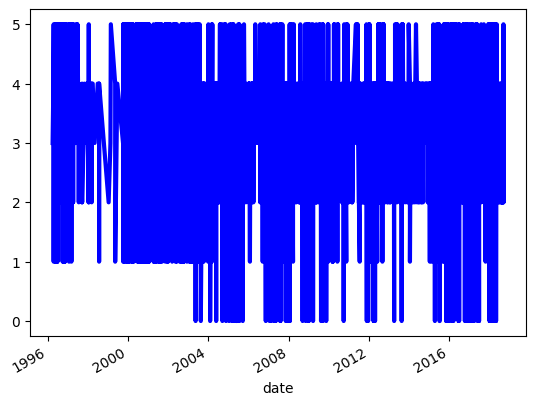

In [13]:
ratings_movies['date']=pd.to_datetime(ratings_movies['date'],yearfirst=True)
ratings_movies['year_rating']=ratings_movies['date'].dt.year

temp=ratings_movies.pivot_table(
    values='rating',   # Значения скоторыми производим операции
    index='genres',    # название строк и групировка по значению
    columns='year_rating',   # название столбцов и групировка по значению
    fill_value=0      # пропуски в таблице на значение 0
    #aggfunc=['median', 'mean']         # функция по умолчанию mean()
    
).round()             # Округляем вывод данных

temp2=ratings_movies.pivot_table(
    values='rating',   # Значения скоторыми производим операции
    index='year_rating',    # название строк и групировка по значению
    columns='genres',   # название столбцов и групировка по значению
    fill_value=0      # пропуски в таблице на значение 0
    #aggfunc=['median', 'mean']         # функция по умолчанию mean()
    
).round()             # Округляем вывод данных

print('За весь период (с 1996 по 2018 год) сочетание жанров Action|Adventure ни разу не получало среднюю оценку ниже 3')
print(temp2['Action|Adventure'].min())
# print('\n Наилучшую оценку жанр Action|Adventure|Animation|Children|Comedy|IMAX получил в 2010 году.')
# print(temp2['Action|Adventure|Animation|Children|Comedy|IMAX'].sort_values(ascending=False))
print('\n Среди сочетаний жанров, получивших наивысшую среднюю оценку в 2018 году, есть сочетание Animation|Children|Mystery')
print('наивысшая оценка 2018')
print(temp[2018].sort_values(ascending=False).head(1))
print('когда Animation|Children|Mystery имел наивысшею оценку')
print(temp2['Animation|Children|Mystery'].sort_values(ascending=False).head(1))
# print('Для жанра Comedy прослеживается тенденция падения рейтинга с каждым годом (с 1996 по 2018)')
# temp2['Comedy'].sort_values()
temp2=ratings_movies[ratings_movies['genres']=='Comedy']

grouped_cases = temp2.groupby('date')['rating'].mean().round()
grouped_cases.plot(
    kind='line',
    # kind='hist',
#     figsize=(10, 6),
#     title='Распределение ежедневной заболеваемости',
#     grid = True,
    color = 'blue',#'black',
    lw=3
    # bins=20
);
# grouped_cases.plot(
#     kind='line',    #тип визуализации. Основные типы
#     figsize=(12, 4),# размер графика (кортеж из ширины и высоты в дюймах)
#     title='Ежедневная заболеваемость во времени',#название графика
#     grid = True,    #отображение сетки (по умолчанию False)
#     color='red',
#     lw=3
# );


8.8

In [14]:
# загрузка
orders = pd.read_csv('../data/orders.csv', sep=';')
products = pd.read_csv('../data/products.csv', sep=';')
print(orders.shape)
# display(orders.head(6))
print(products.shape)
print(list(products['Product_ID']))
print(list(orders['ID товара']))

(18, 9)
(14, 4)
[47, 51, 53, 71, 74, 86, 91, 103, 104, 124, 137, 138, 139, 140]
[103, 86, 104, 104, 104, 103, 124, 91, 103, 104, 74, 53, 137, 47, 71, 86, 51, 666]


In [15]:
orders_products = orders.join(
    products.set_index('Product_ID'),
    on='ID товара',
    how='left'
)
# orders_products = orders.merge(
#     products,
#     on='Product_ID',
#     how='outer'
# )
print('Число строк в таблице merged2: ', orders_products.shape[0])
display(orders_products.tail())

Число строк в таблице merged2:  18


,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество,Name,Price,CURRENCY
13,08.11.2019 08:36:21,2,7,Выполнен,Да,Нет,Да,47,1,Шатны Полосатый рейс,2999.0,RUR
14,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,71,1,Платье Ночная Жизнь,7999.0,RUR
15,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,86,1,"Носки Простые, муж",45.0,RUR
16,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,51,1,Платье Аленький цветочек,4999.0,RUR
17,01.01.2001 00:00:00,0,1,"Оплачен, формируется к отправке",Да,Нет,Нет,666,1,NaN,NaN,NaN


8.9

На какой товар была произведена отмена?

In [16]:
orders_products[orders_products['Отменен']=='Да']['Name']

6    Носки беговые Camino
Name: Name, dtype: object

8.10

Какой покупатель принёс наибольшую суммарную прибыль интернет-магазину за указанный период?

In [17]:
orders_products['suss_pr']=orders_products['Количество']*orders_products['Price']
temp=orders_products[orders_products['Оплачен']=='Да']
temp.groupby('ID Покупателя')['suss_pr'].sum().sort_values(ascending=False)

ID Покупателя
7    17096.0
5    13043.0
8     1344.0
1        0.0
Name: suss_pr, dtype: float64